## Intrinsic currents subthreshold
* https://nest-simulator.readthedocs.io/en/latest/auto_examples/intrinsic_currents_subthreshold.html

### Reference for the model neuron (ht_neuron)
* Hill and Tononi (2005) Modeling Sleep and Wakefulness in the Thalamocortical System J Neurophysiol 93:1671 http://dx.doi.org/10.1152/jn.00915.2004.



In [49]:
import matplotlib.pyplot as plt
import nest
%matplotlib inline

In [50]:
#nest.set_verbosity("M_WARNING")
nest.ResetKernel()

In [51]:
n_blocks = 5
t_block = 20.0
t_dep = [t_block] * n_blocks
t_hyp = [t_block * 2**n for n in range(n_blocks)]
I_dep = 10.0
I_hyp = -5.0

t_end = 500.0

In [52]:
nrn = nest.Create("ht_neuron")
dc = nest.Create("dc_generator")

In [53]:
record_list = list(nest.GetDefaults('ht_neuron')['recordables'])

In [54]:
print(record_list)

['g_AMPA', 'g_GABA_A', 'g_GABA_B', 'g_NMDA', 'I_h', 'I_KNa', 'I_NaP', 'I_T', 'theta', 'V_m']


In [55]:
# create multimeter and configure it to record all information
# we want at 0.1 ms resolution
mm = nest.Create(
    "multimeter", params={"interval": 0.1, "record_from": ["V_m", "theta", "I_NaP", "I_KNa", "I_T", "I_h"]}
)

In [56]:
nest.Connect(dc, nrn)
nest.Connect(mm, nrn)

In [57]:
for t_sim_dep, t_sim_hyp in zip(t_dep, t_hyp):
    dc.amplitude = I_dep
    nest.Simulate(t_sim_dep)

    dc.amplitude = I_hyp
    nest.Simulate(t_sim_hyp)


Oct 10 09:30:33 NodeManager::prepare_nodes [Info]: 
    Preparing 3 nodes for simulation.

Oct 10 09:30:33 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 3
    Simulation time (ms): 20
    Number of OpenMP threads: 1
    Number of MPI processes: 1

Oct 10 09:30:33 SimulationManager::run [Info]: 
    Simulation finished.

Oct 10 09:30:33 NodeManager::prepare_nodes [Info]: 
    Preparing 3 nodes for simulation.

Oct 10 09:30:33 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 3
    Simulation time (ms): 20
    Number of OpenMP threads: 1
    Number of MPI processes: 1

Oct 10 09:30:33 SimulationManager::run [Info]: 
    Simulation finished.

Oct 10 09:30:33 NodeManager::prepare_nodes [Info]: 
    Preparing 3 nodes for simulation.

Oct 10 09:30:33 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 3
    Simulation time (ms): 20
    Number of OpenMP threads: 1
    Number of MPI processes: 1

Oct 10 09:30:33 SimulationManage

In [58]:
data = mm.events
t = data["times"]

In [59]:
conns = nest.GetConnections(dc, nrn)
delay = conns.delay
dt = nest.resolution

t_dc, I_dc = [0], [0]

for td, th in zip(t_dep, t_hyp):
    t_prev = t_dc[-1]
    t_start_dep = t_prev + dt
    if t_prev == 0:
        t_start_dep += delay
    t_end_dep = t_start_dep + td
    t_start_hyp = t_end_dep + dt
    t_end_hyp = t_start_hyp + th

    t_dc.extend([t_start_dep, t_end_dep, t_start_hyp, t_end_hyp])
    I_dc.extend([I_dep, I_dep, I_hyp, I_hyp])

In [60]:
def texify_name(name):
    if len(name.split("_")) == 1:
        return r"${}$".format(name)
    elif len(name.split("_")) == 2:
        return r"${}_{{\mathrm{{{}}}}}$".format(*name.split("_"))
    elif len(name.split("_")) == 3:
        return r"${}_{{\mathrm{{{}_{}}}}}$".format(*name.split("_"))

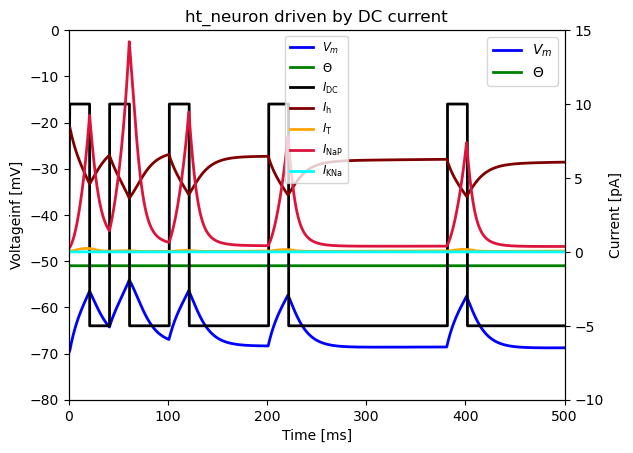

In [61]:
fig = plt.figure()
Vax = fig.add_subplot(111)
Vax.plot(t, data["V_m"], "b-", lw=2, label=r"$V_m$")
Vax.plot(t, data["theta"], "g-", lw=2, label=r"$\Theta$")
Vax.set_ylim(-80.0, 0.0)
plt.legend(loc="best")
Vax.set_ylabel("Voltageinf [mV]")
Vax.set_xlabel("Time [ms]")

Iax = Vax.twinx()
Iax.plot(t_dc, I_dc, "k-", lw=2, label=texify_name("I_DC"))

for iname, color in (("I_h", "maroon"), ("I_T", "orange"), ("I_NaP", "crimson"), ("I_KNa", "aqua")):
    Iax.plot(t, data[iname], color=color, lw=2, label=texify_name(iname))

Iax.set_xlim(0, t_end)
Iax.set_ylim(-10.0, 15.0)
Iax.set_ylabel("Current [pA]")
Iax.set_title("ht_neuron driven by DC current")
lines_V, labels_V = Vax.get_legend_handles_labels()
lines_I, labels_I = Iax.get_legend_handles_labels()
try:
    Iax.legend(lines_V + lines_I, labels_V + labels_I, fontsize="small")
except TypeError:
    # work-around for older Matplotlib versions
    Iax.legend(lines_V + lines_I, labels_V + labels_I)
plt.show()